In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.metrics import r2_score

In [3]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [4]:
X = 6*np.random.rand(200,1) -3
y = 0.8*X**2 + 0.9*X + 2 + np.random.randn(200,1)

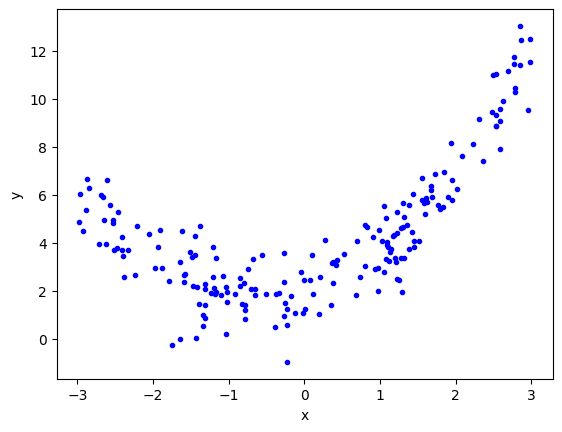

In [5]:
plt.plot(X,y,"b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [7]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.43306238503700945

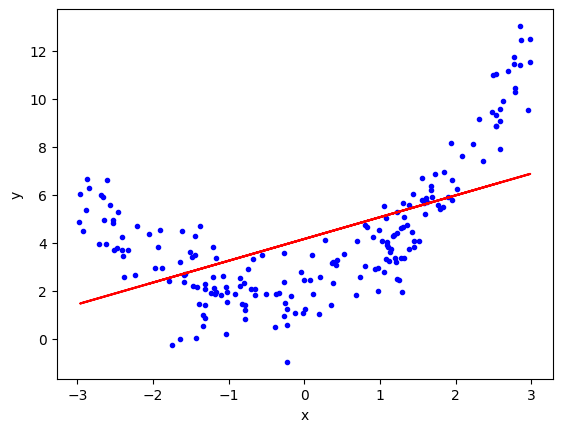

In [9]:
plt.plot(X,y,"b.")
plt.plot(X_train,lr.predict(X_train),color = "r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [22]:
# applying polynomial regression
#include_bias = true ==> X^0 included
#include_bias =false ==> X^0 is not included
poly = PolynomialFeatures(degree=5,include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)    


In [23]:
print(X_train[0])
print(X_train_trans[0])

[-2.0563131]
[  1.          -2.0563131    4.22842355  -8.69496273  17.87956573
 -36.76598516]


In [24]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.8800327861646721

In [25]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.          0.67611431  0.75500538  0.13501505  0.00655845 -0.01247948]]
[2.04250609]


In [26]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

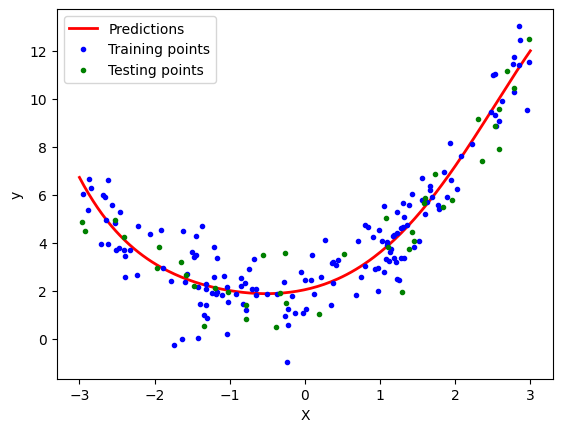

In [27]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()